In [1]:
#Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
#Leemos los archivos a trabajar
df1 = pd.DataFrame( pd.read_csv("meteo-nogal-09.csv", engine="python" ) )
df2 = pd.DataFrame( pd.read_csv("soil-nogal-09.csv"))

In [3]:
df1.tail()

,DATE,TIME,Unnamed: 2,Unnamed: 3,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,...,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
52634,03/01/2010,08:10:00,912.0,1.059,1.146,-0.171,7.161,1558,24.1,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52635,03/01/2010,08:30:00,913.0,0.672,1.454,-0.057,9.64,1549,64.78,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52636,03/01/2010,08:40:00,914.0,0.851,1.321,-0.141,10.38,1563,76.34,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52637,03/01/2010,08:50:00,915.0,0.757,1.295,-0.094,11.25,1564,97.7,NAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52638,03/01/2010,09:00:00,916.0,0.584,0.75,-0.025,12.03,1564,120.1,871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.dtypes

DATE            object
TIME            object
Unnamed: 2     float64
Unnamed: 3     float64
u_Avg           object
v_Avg           object
w_Avg           object
t_Avg           object
kh20_Avg        object
net_rad_Avg     object
shf1_Avg        object
shf2_Avg        object
vv_Avg          object
airT_Avg        object
rh_Avg         float64
e_sat_Avg       object
e_Avg           object
h2o_hmp_Avg     object
Unnamed: 18    float64
Unnamed: 19     object
Unnamed: 20     object
Unnamed: 21    float64
Unnamed: 22     object
Unnamed: 23     object
Unnamed: 24     object
Unnamed: 25     object
Unnamed: 26     object
Unnamed: 27     object
Unnamed: 28     object
Unnamed: 29     object
Unnamed: 30     object
Unnamed: 31     object
Unnamed: 32     object
Unnamed: 33     object
Unnamed: 34     object
Unnamed: 35     object
dtype: object

In [5]:
df2.dtypes

id                        int64
2 Year_RTM  L             int64
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L      int64
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
35 TVWC_

In [6]:
#Es necesario adaptar los DataFrames para poder trabajar con ellos.
#Eliminamos la fila que dicta las unidades de cada columna en el df1
df1 = df1.drop(df1.columns[df1.columns.str.contains('unnamed:',case=False)],axis=1)
df1 = df1.drop(df1.index[0]).reset_index(drop=True)

In [7]:
#Vemos que el df2 tiene sus unidades de tiempo cada media hora. Necesitamos que los tiempos del df1 sean de la 
#misma manera.
#Creamos una variable DATETIME que junte las columnas DATE y TIME para df1
df1["DATETIME"] = df1["DATE"] +" "+ df1["TIME"]
#Eliminamos las columnas DATE y TIME
df1.drop( ["DATE","TIME"], axis=1, inplace=True )

In [8]:
df1.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,DATETIME
52633,1.146,-0.171,7.161,1558,24.1,NAN,NAN,1.618,7.829,0.328,1.060,0.348,2.681,NaN,03/01/2010 08:10:00
52634,1.454,-0.057,9.64,1549,64.78,NAN,NAN,1.679,10.43,0.292,1.263,0.369,2.816,NaN,03/01/2010 08:30:00
52635,1.321,-0.141,10.38,1563,76.34,NAN,NAN,1.662,11.47,0.273,1.354,0.369,2.808,NaN,03/01/2010 08:40:00
52636,1.295,-0.094,11.25,1564,97.7,NAN,NAN,1.62,12.59,0.256,1.457,0.373,2.83,NaN,03/01/2010 08:50:00
52637,0.75,-0.025,12.03,1564,120.1,871,NAN,1.054,13.58,0.243,1.554,0.377,2.85,NaN,03/01/2010 09:00:00


In [9]:
#Convertimos nuestra variable DATETIME en una variable FECHA del tipo date
df1['FECHA'] = pd.to_datetime(df1.apply(lambda x: x['DATETIME'], 1), dayfirst=True)
df1 = df1.drop(['DATETIME'], 1)
df1.head(3)

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01 00:10:00
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01 00:20:00
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00


In [10]:
#De nuestra variable FECHA, obtenemos una nueva variable que contabilice los minutos transcurridos
df1['MIN'] = df1['FECHA'].dt.minute
df1.tail(6)

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA,MIN
52632,1.044,-0.164,6.867,1538,8.8,NAN,NAN,1.326,7.306,0.341,1.022,0.349,2.697,NaN,2010-01-03 08:00:00,0.0
52633,1.146,-0.171,7.161,1558,24.1,NAN,NAN,1.618,7.829,0.328,1.060,0.348,2.681,NaN,2010-01-03 08:10:00,10.0
52634,1.454,-0.057,9.64,1549,64.78,NAN,NAN,1.679,10.43,0.292,1.263,0.369,2.816,NaN,2010-01-03 08:30:00,30.0
52635,1.321,-0.141,10.38,1563,76.34,NAN,NAN,1.662,11.47,0.273,1.354,0.369,2.808,NaN,2010-01-03 08:40:00,40.0
52636,1.295,-0.094,11.25,1564,97.7,NAN,NAN,1.62,12.59,0.256,1.457,0.373,2.83,NaN,2010-01-03 08:50:00,50.0
52637,0.75,-0.025,12.03,1564,120.1,871,NAN,1.054,13.58,0.243,1.554,0.377,2.85,NaN,2010-01-03 09:00:00,0.0


In [11]:
#Filtramos ahora las filas de nuestro df1 para los valores de cada media hora, es decir, aquellos donde la variable
#'MIN' es igual a 30.0 (media hora) o a 0.0 (una hora); filtramos también todos aquellos que no sean del año 2009.
df1 = df1[((df1["MIN"] == 30.0) | (df1["MIN"] == 0.0)) & (df1["FECHA"] < '2010-01-01 00:30:00')]
df1 = df1.reset_index(drop=True)
df1.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA,MIN
17441,1.676,-0.139,14.36,1113,-79.21,NAN,NAN,3.067,14.7,0.407,1.672,0.681,5.126,NaN,2009-12-31 22:00:00,0.0
17442,1.196,-0.12,14.17,1170,-78.89,NAN,NAN,2.683,14.63,0.388,1.664,0.645,4.855,NaN,2009-12-31 22:30:00,30.0
17443,0.454,-0.074,12.63,1060,-72.47,NAN,NAN,2.419,13,0.472,1.497,0.707,5.354,NaN,2009-12-31 23:00:00,0.0
17444,0.746,-0.116,11.9,1043,-74.88,NAN,NAN,2.38,12.3,0.5,1.430,0.715,5.428,NaN,2009-12-31 23:30:00,30.0
17445,0.72,-0.078,11.02,1071,-70.44,NAN,NAN,2.068,11.28,0.521,1.336,0.696,5.299,NaN,2010-01-01 00:00:00,0.0


In [12]:
#Para nuestro df2, necesitamos acomodar los minutos de igual manera. Para esto, necesitamos separar las horas de manera
#que el tiempo se denote "HORA:MINUTOS".
#Convertimos la variable '4 Hour_Minute_RTM  L' y '2 Year_RTM  L ' a object
df2['4 Hour_Minute_RTM  L'] = df2['4 Hour_Minute_RTM  L'].astype(str)
df2['2 Year_RTM  L'] = df2['2 Year_RTM  L'].astype(str)

In [13]:
#Llenamos un arreglo de horas y minutos para cada dato

h=[]   #Arreglo de horas.
m=[]   #Arreglo de minutos.

for i in range (0, len(df2)):
    if (len(str(df2['4 Hour_Minute_RTM  L'][i]))==4):
        if (str(df2['4 Hour_Minute_RTM  L'][i])[0:2]=='24'):
            h.append('00')
            m.append('00')
        else:
            h.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:2])
            m.append(str(df2['4 Hour_Minute_RTM  L'][i])[2:4])
    elif (len(str(df2['4 Hour_Minute_RTM  L'][i]))==3):
            h.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:1])
            m.append(str(df2['4 Hour_Minute_RTM  L'][i])[1:3])
    elif (len(str(df2['4 Hour_Minute_RTM  L'][i]))==2):
            h.append('00')
            m.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:2])

In [14]:
#Creamos una variable del tipo string para la fecha que incluya el año, el número de día, la hora y el minuto
t = []   #Arreglo de tiempo
for i in range (0,len(df2)):
    t.append( h[i]+':'+m[i])

In [15]:
df2['TIEMPO'] = t
df2.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,TIEMPO
17477,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:00
17478,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:30
17479,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:00
17480,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:30
17481,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00


In [16]:
df2.dtypes

id                        int64
2 Year_RTM  L            object
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L     object
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
36 TVWC_

In [17]:
df2.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_30cm.1,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,TIEMPO
17477,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:00
17478,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:30
17479,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:00
17480,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:30
17481,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00


In [18]:
#Llenamos un arreglo de días que corrija los valores de días para las medias noches
d = []
j = -1
for i in range (0,len(df2)):
    if(((df2['TIEMPO'][i])=='00:00')):
        d.append(df2['3 Day_RTM  L'][i]+1)
    elif((df2['TIEMPO'][i]!='00:00')):
        d.append(df2['3 Day_RTM  L'][i])

In [19]:
#Creamos una variable con los días y años corregidos
df2['DIA'] = d
df2.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_40cm.1,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,TIEMPO,DIA
17477,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:00,365
17478,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:30,365
17479,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:00,365
17480,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:30,365
17481,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00,366


In [20]:
#Creamos una variable del tipo string para la fecha que incluya el año, el número de día, la hora y el minuto
f = []   #Arreglo de fechas
for i in range (0,len(df2)):
    f.append('2009 ' + str(df2['DIA'][i]) + ' ' + h[i] + ' ' + m[i])

In [21]:
#Convertimos nuestro arreglo de fechas en una variable del tipo datetime
FECHA = []
for i in range(0,len(df2)):
    d=datetime.datetime.strptime(f[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECHA.append(F)

In [22]:
#Agregamos la columna FECHA al dataframe
df2['F']=FECHA

In [23]:
df2['FECHA'] = pd.to_datetime(df2.apply(lambda x: x['F'], 1), dayfirst=True)
df2 = df2.drop(['F'], 1)
df2.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,TIEMPO,DIA,FECHA
17477,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:00,365,2009-12-31 22:00:00
17478,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:30,365,2009-12-31 22:30:00
17479,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:00,365,2009-12-31 23:00:00
17480,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:30,365,2009-12-31 23:30:00
17481,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00,366,2010-01-01 00:00:00


In [24]:
#Quitamos ahora las fechas duplicadas de nuestro segundo DataFrame
df2 = pd.DataFrame(df2.drop_duplicates(['FECHA']))
df2 = df2.reset_index(drop=True)
df2.tail()

,id,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,5 T108v_1_AVG L,6 T108v_2_AVG L,7 T108v_3_AVG L,8 T108v_4_AVG L,9 T108v_5_AVG L,10 T108v_6_AVG L,...,THETA_55cm.1,THETA_70cm.1,THETA_85cm.1,THETA_100cm.1,62 batt L.1,63 lluvia_TOT L,Rs (splite).1,TIEMPO,DIA,FECHA
17421,148,2009,365,2200,0.944,0.950,0.977,0.992,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:00,365,2009-12-31 22:00:00
17422,148,2009,365,2230,0.944,0.951,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22:30,365,2009-12-31 22:30:00
17423,148,2009,365,2300,0.944,0.952,0.977,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:00,365,2009-12-31 23:00:00
17424,148,2009,365,2330,0.944,0.952,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:30,365,2009-12-31 23:30:00
17425,148,2009,365,2400,0.943,0.953,0.978,0.993,1.012,1.045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,00:00,366,2010-01-01 00:00:00


In [25]:
#Quitamos ahora las fechas duplicadas de nuestro primer DataFrame
df1 = pd.DataFrame(df1.drop_duplicates(['FECHA']))
df1 = df1.reset_index(drop=True)
df1.tail()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA,MIN
17387,1.676,-0.139,14.36,1113,-79.21,NAN,NAN,3.067,14.7,0.407,1.672,0.681,5.126,NaN,2009-12-31 22:00:00,0.0
17388,1.196,-0.12,14.17,1170,-78.89,NAN,NAN,2.683,14.63,0.388,1.664,0.645,4.855,NaN,2009-12-31 22:30:00,30.0
17389,0.454,-0.074,12.63,1060,-72.47,NAN,NAN,2.419,13,0.472,1.497,0.707,5.354,NaN,2009-12-31 23:00:00,0.0
17390,0.746,-0.116,11.9,1043,-74.88,NAN,NAN,2.38,12.3,0.5,1.430,0.715,5.428,NaN,2009-12-31 23:30:00,30.0
17391,0.72,-0.078,11.02,1071,-70.44,NAN,NAN,2.068,11.28,0.521,1.336,0.696,5.299,NaN,2010-01-01 00:00:00,0.0


In [26]:
#Buscamos ahora las similitudes de FECHA entre nuestro primer y segundo DataFrame.
#Filtramos los DataFrames por las columnas que vamos a utilizar
df1 = df1.filter(['FECHA','t_Avg','airT_Avg'],axis=1)
df2 = df2.filter(['FECHA','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm','Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],axis=1)

In [27]:
#Unimos los DataFrames a partir de los valores coincidentes de la variable FECHA
df = pd.merge(df1, df2, on=['FECHA'])

In [28]:
df.head()

,FECHA,t_Avg,airT_Avg,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,2009-01-01 00:30:00,10.34,9.059999,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,2009-01-01 01:00:00,8.76,8.34,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,2009-01-01 01:30:00,8.69,7.539001,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,2009-01-01 02:00:00,7.612,6.76,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,2009-01-01 02:30:00,7.761,7.288001,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [29]:
#Convertimos las temperaturas promedio y la temperatura del aire a variables numéricas
df[df.columns[1:3]] = df[df.columns[1:3]].apply(pd.to_numeric,errors='coerce')
df.dtypes

FECHA           datetime64[ns]
t_Avg                  float64
airT_Avg               float64
Tsuelo_10cm            float64
Tsuelo_20cm            float64
Tsuelo_30cm            float64
Tsuelo_40cm            float64
Tsuelo_55cm            float64
Tsuelo_70cm            float64
Tsuelo_85cm            float64
Tsuelo_100cm           float64
dtype: object

In [30]:
#Buscamos graficar las temperaturaas del aire y del suelo para un día de enero. 
df_1dia = df[df["FECHA"] < '2009-01-02 00:00:00']
df_1dia = df_1dia.filter(['t_Avg','airT_Avg','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_40cm','Tsuelo_85cm'])
df_1dia = df_1dia.reset_index(drop=True)
df_1dia.tail()

,t_Avg,airT_Avg,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm
42,14.89,14.83,14.77,14.81,15.57,17.69
43,14.61,13.40,14.77,14.84,15.58,17.69
44,14.07,14.02,14.75,14.86,15.58,17.70
45,13.98,13.77,14.73,14.88,15.59,17.70
46,14.15,13.76,14.71,14.89,15.61,17.69


<Figure size 864x576 with 0 Axes>

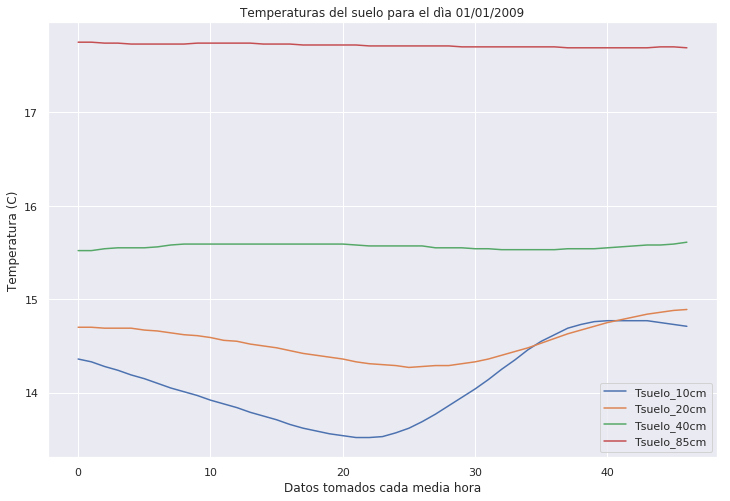

In [31]:
#Realizamos una gráfica para la temperatura del suelo a distintos niveles de profundidad
sns.set(rc={'figure.figsize':(12,8)})

fig = plt.figure(); df_1dia[df_1dia.columns[2:6]].plot(); plt.legend(loc='best')
plt.title('Temperaturas del suelo para el dìa 01/01/2009')
plt.ylabel('Temperatura (C)')
plt.xlabel('Datos tomados cada media hora')

plt.grid(True)

fig.savefig("Tsuelo1dia",plt=2000)

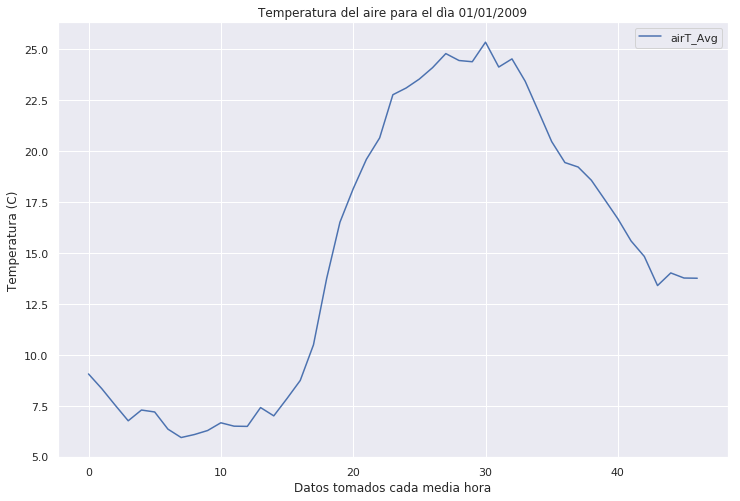

In [32]:
#Realizamos una gráfica para la temperatura del aire
sns.set(rc={'figure.figsize':(12,8)})

fig = plt.figure(); df_1dia['airT_Avg'].plot(); plt.legend(loc='best')
plt.title('Temperatura del aire para el dìa 01/01/2009')
plt.ylabel('Temperatura (C)')
plt.xlabel('Datos tomados cada media hora')

plt.grid(True)

fig.savefig("Taire1dia",plt=2000)

In [33]:
#Buscamos las temperaturas máximas y mínimas, así como el promedio, para cada día del 2009.

#Creamos una variable DIA que indique el día del año para cada valor
df['DIA'] = df['FECHA'].dt.day

#Creamos un dataframe que organice los valores por día
df_d = df.filter(['DIA','airT_Avg','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_40cm','Tsuelo_85cm'])

In [34]:
#Realizar una gráfica de temperaturas T_max, T_min y T_promedio diarias para el año completo de datos 2009. 

#Trabajaremos sobre un nuevo dataframe
df_graf2=df

#Primero crearemos variables para día y mes
df_graf2['DIA']=df_graf2['FECHA'].dt.day
df_graf2['MES']=df_graf2['FECHA'].dt.month


#Creamos un data frame para cada una de las  4 temperaturas del suelo

#Data frame para Tsuelo_10cm 
df_10=df_graf2.filter(['DIA','MES','Tsuelo_10cm'],axis=1)
#Calculamos tmin, tmax y tmean
df_10["Tsuelo_10cm_max"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("max"),decimals=1)
df_10["Tsuelo_10cm_min"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("min"),decimals=1)
df_10["Tsuelo_10cm_mean"] = np.round(df_10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se grafican
df_10 = df_10.drop(['Tsuelo_10cm','DIA','MES'], 1)

#Data frame para Tsuelo_20cm 
df_20=df_graf2.filter(['DIA','MES','Tsuelo_20cm'],axis=1)
#Calculamos tmin, tmax y tmean
df_20["Tsuelo_20cm_max"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("max"),decimals=1)
df_20["Tsuelo_20cm_min"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("min"),decimals=1)
df_20["Tsuelo_20cm_mean"] = np.round(df_20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se grafican
df_20 = df_20.drop(['Tsuelo_20cm','DIA','MES'], 1)

#Data frame para Tsuelo_40cm 
df_40=df_graf2.filter(['DIA','MES','Tsuelo_40cm'],axis=1)
#Calculamos tmin, tmax y tmean
df_40["Tsuelo_40cm_max"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("max"),decimals=1)
df_40["Tsuelo_40cm_min"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("min"),decimals=1)
df_40["Tsuelo_40cm_mean"] = np.round(df_40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se grafican
df_40 = df_40.drop(['Tsuelo_40cm','DIA','MES'], 1)

#Data frame para Tsuelo_85cm 
df_85=df_graf2.filter(['DIA','MES','Tsuelo_85cm'],axis=1)
#Calculamos tmin, tmax y tmean
df_85["Tsuelo_85cm_max"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("max"),decimals=1)
df_85["Tsuelo_85cm_min"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("min"),decimals=1)
df_85["Tsuelo_85cm_mean"] = np.round(df_85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("mean"),decimals=1)
#Quitamos los datos que no se grafican
df_85 = df_85.drop(['Tsuelo_85cm','DIA','MES'], 1)

<Figure size 864x595.44 with 0 Axes>

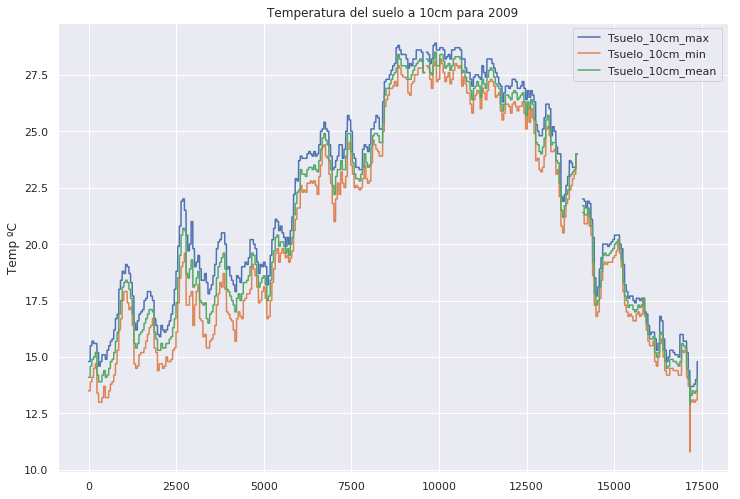

In [35]:
#Gráfica para Tsuelo_10cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_10.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T10",plt=2000)

<Figure size 864x595.44 with 0 Axes>

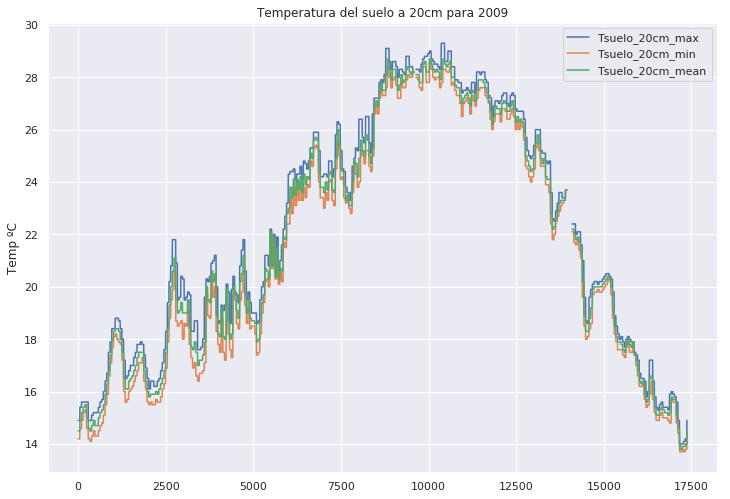

In [36]:
#Gráfica para Tsuelo_20cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_20.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 20cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T20",plt=2000)

<Figure size 864x595.44 with 0 Axes>

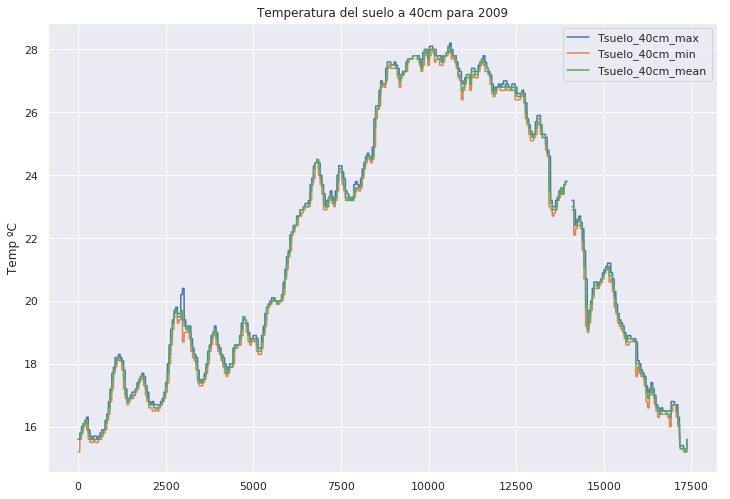

In [37]:
#Gráfica para Tsuelo_40cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_40.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 40cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T40",plt=2000)

<Figure size 864x595.44 with 0 Axes>

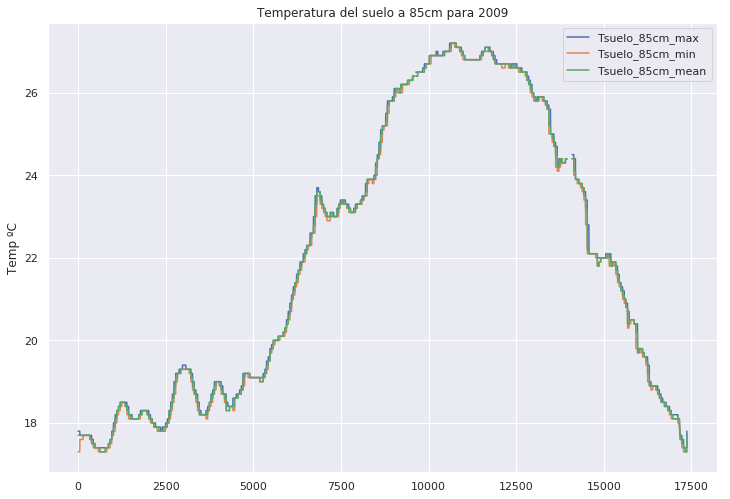

In [38]:
#Gráfica para Tsuelo_85cm
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_85.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 85cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T85",plt=2000)

In [39]:
#Realizamos la gráfica para la temperatura del aire

#Trabajamos sobre un data frame nuevo para esta gráfica, donde únicamente nos interesa la temperatura del aire
df_graf2=df_graf2.filter(['DIA','MES','airT_Avg'],axis=1)

df_graf2.head()

#Convertimos los datos a float 64
df_graf2[df_graf2.columns[1:3]]=df_graf2[df_graf2.columns[1:3]].apply(pd.to_numeric,errors='coerce')
df_graf2.dtypes

DIA           int64
MES           int64
airT_Avg    float64
dtype: object

In [40]:
#Agrupamos y usamos la función transform para obtener la temperatura máxima, mínima y promedio del aire
df_graf2["airT_Avg_max"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("max"),decimals=1)
df_graf2["airT_Avg_min"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("min"),decimals=1)
df_graf2["airT_Avg_mean"] = np.round(df_graf2.groupby(["MES","DIA"])["airT_Avg"].transform("mean"),decimals=1)

#Quitamos las columnas que no nos interesan para realizar la gráfica
df_graf2 = df_graf2.drop(['airT_Avg','DIA','MES'], 1)
df_graf2.head()

,airT_Avg_max,airT_Avg_min,airT_Avg_mean
0,25.4,0.5,14.7
1,25.4,0.5,14.7
2,25.4,0.5,14.7
3,25.4,0.5,14.7
4,25.4,0.5,14.7


<Figure size 864x595.44 with 0 Axes>

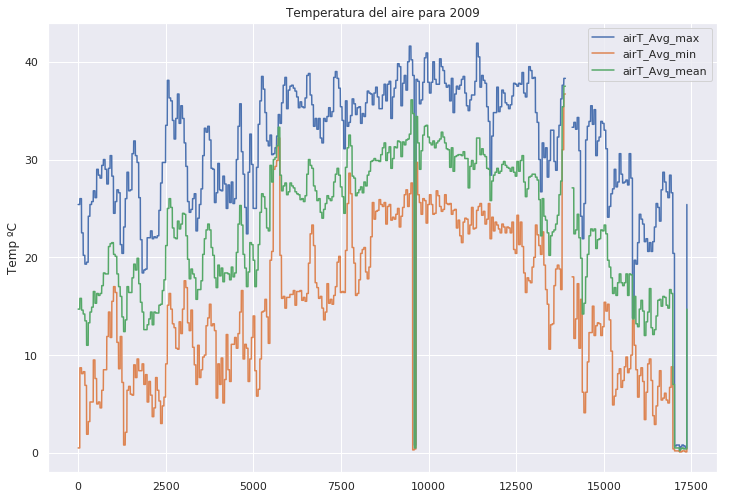

In [41]:
#Elaboramos la gráfica de la temperatura del aire promedio, máxima y mínima por día para todo 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graf2.plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("Tair2009",plt=2000)

In [42]:
#Calcular el promedio cada 30 minutos durante el día para el mes de Enero de 
#la temperatura del aire y las 8 temperaturas promedio de subsuelo, para posteriormente
#graficar la variación en 24 horas de las temperaturas de interés.

#Reducimos el data frame al mes de enero
df_graf3=df[df['FECHA']<'2009-02-01 00:00:00']

#Tomamos las temperaturas del suelo
df_graf3_s = df_graf3.filter(['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm',
                              'Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],axis=1)
df_graf3_s.head()

,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


<Figure size 864x595.44 with 0 Axes>

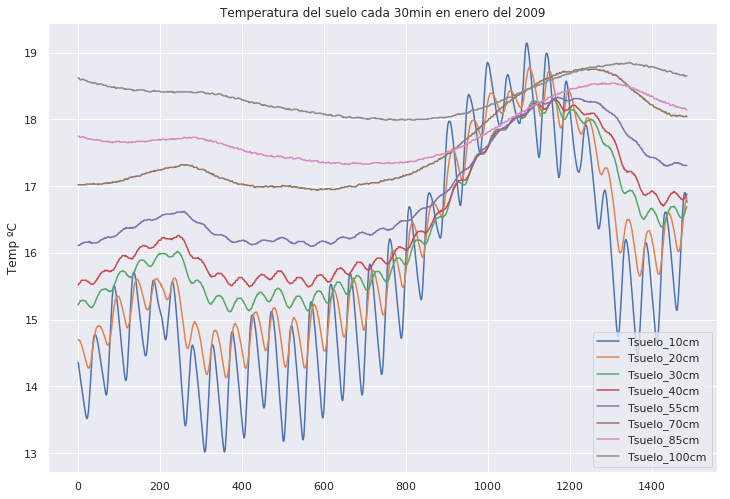

In [43]:
#Gráfica de temperaturas del suelo cada 30 min para enero del 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graf3_s.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo cada 30min en enero del 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T30SueloEnero",plt=2000)

In [44]:
#Ahora tomamos la temperatura del aire
df_graf3 = df_graf3.filter(['airT_Avg'],axis=1)
df_graf3=df_graf3.apply(pd.to_numeric,errors='coerce')
df_graf3.dtypes

airT_Avg    float64
dtype: object

<Figure size 864x595.44 with 0 Axes>

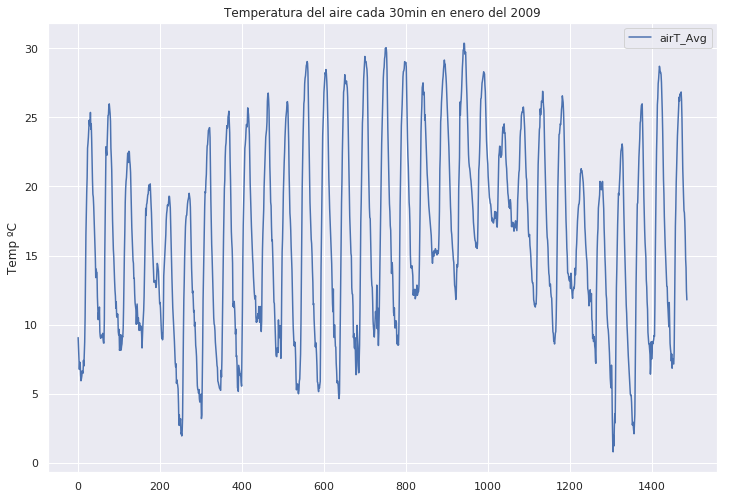

In [45]:
#Gráfica de temperatura del aire cada 30 min para enero del 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_graf3.plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire cada 30min en enero del 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T30AireEnero",plt=2000)

In [46]:
#Reproduciremos las gráficas aplicando el promedio móvil (rolling mean)

#Agregamos la variable fecha que desechamos anteriormente
df_10['FECHA']=df['FECHA']
df_20['FECHA']=df['FECHA']
df_40['FECHA']=df['FECHA']
df_85['FECHA']=df['FECHA']
df_graf2['FECHA']=df['FECHA']


#Creamos un nuevo data frame para los promedios móviles
df_10roll = pd.DataFrame()
df_20roll = pd.DataFrame()
df_40roll = pd.DataFrame()
df_85roll = pd.DataFrame()
df_airTroll = pd.DataFrame()


#Calculamos el promedio móvil de cada una de las temperaturas
df_10roll["max10"]=df_10.Tsuelo_10cm_max.rolling(60, min_periods=1).mean()
df_10roll["min10"]=df_10.Tsuelo_10cm_min.rolling(60, min_periods=1).mean()
df_10roll["mean10"]=df_10.Tsuelo_10cm_mean.rolling(60, min_periods=1).mean()

df_20roll["max20"]=df_20.Tsuelo_20cm_max.rolling(60, min_periods=1).mean()
df_20roll["min20"]=df_20.Tsuelo_20cm_min.rolling(60, min_periods=1).mean()
df_20roll["mean20"]=df_20.Tsuelo_20cm_mean.rolling(60, min_periods=1).mean()

df_40roll["max40"]=df_40.Tsuelo_40cm_max.rolling(60, min_periods=1).mean()
df_40roll["min40"]=df_40.Tsuelo_40cm_min.rolling(60, min_periods=1).mean()
df_40roll["mean40"]=df_40.Tsuelo_40cm_mean.rolling(60, min_periods=1).mean()

df_85roll["max85"]=df_85.Tsuelo_85cm_max.rolling(60, min_periods=1).mean()
df_85roll["min85"]=df_85.Tsuelo_85cm_min.rolling(60, min_periods=1).mean()
df_85roll["mean85"]=df_85.Tsuelo_85cm_mean.rolling(60, min_periods=1).mean()

df_airTroll["max_air"]=df_graf2.airT_Avg_max.rolling(60, min_periods=1).mean()
df_airTroll["min_air"]=df_graf2.airT_Avg_min.rolling(60, min_periods=1).mean()
df_airTroll["mean_air"]=df_graf2.airT_Avg_mean.rolling(60, min_periods=1).mean()

<Figure size 864x595.44 with 0 Axes>

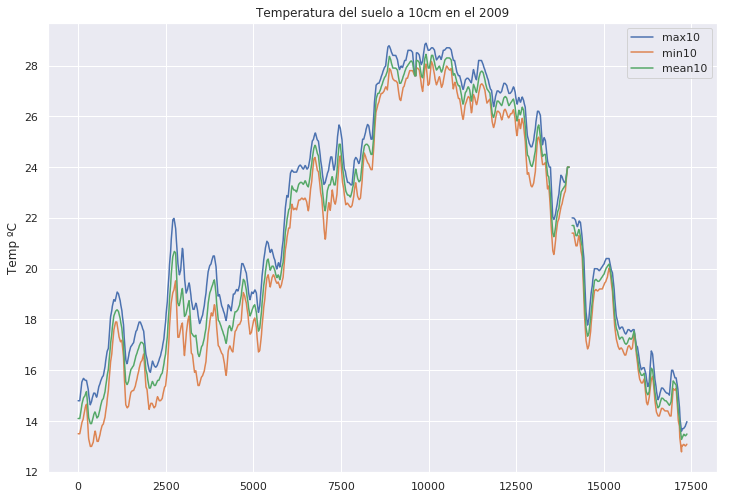

In [47]:
#Gráfica suavizada de la temperatura del suelo a 10cm para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_10roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10cm en el 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T10roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

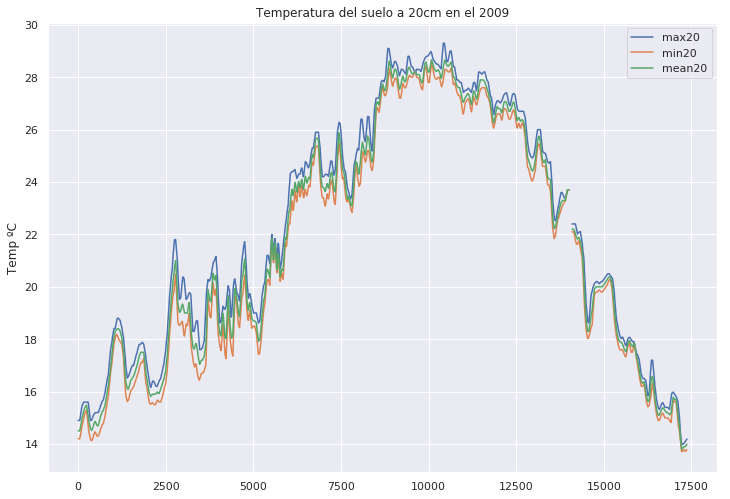

In [48]:
#Gráfica suavizada de la temperatura del suelo a 20cm para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_20roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 20cm en el 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T20roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

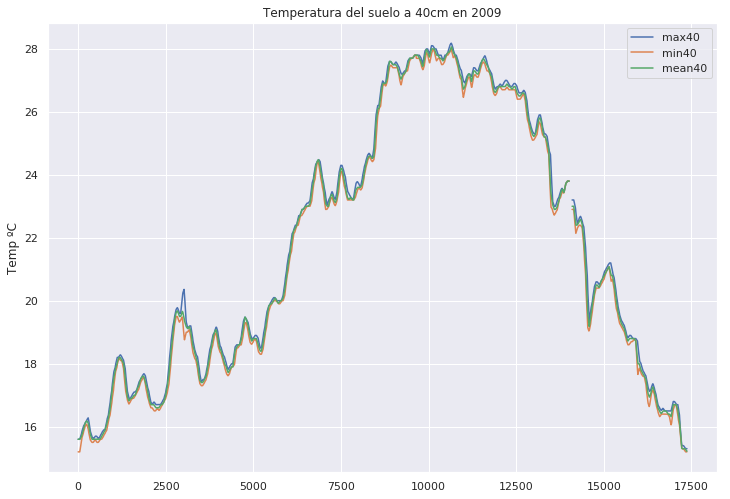

In [49]:
#Gráfica suavizada de la temperatura del suelo a 40cm para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_40roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 40cm en 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T40roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

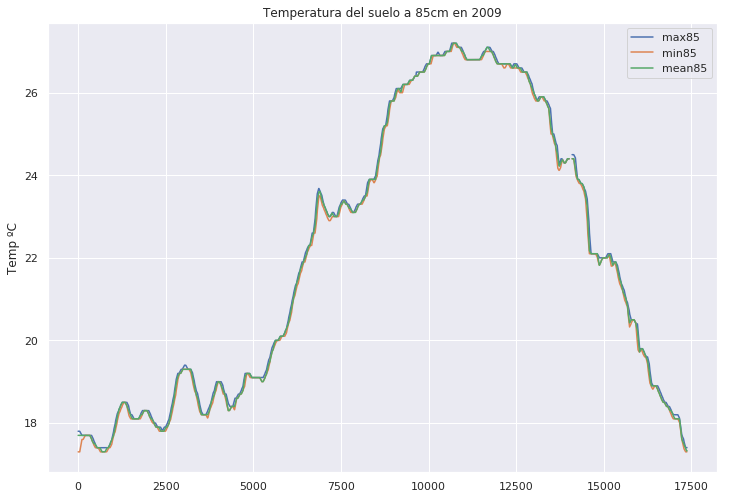

In [50]:
#Gráfica suavizada de la temperatura del suelo a 85cm para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_85roll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 85cm en 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("T85roll",plt=2000)

<Figure size 864x595.44 with 0 Axes>

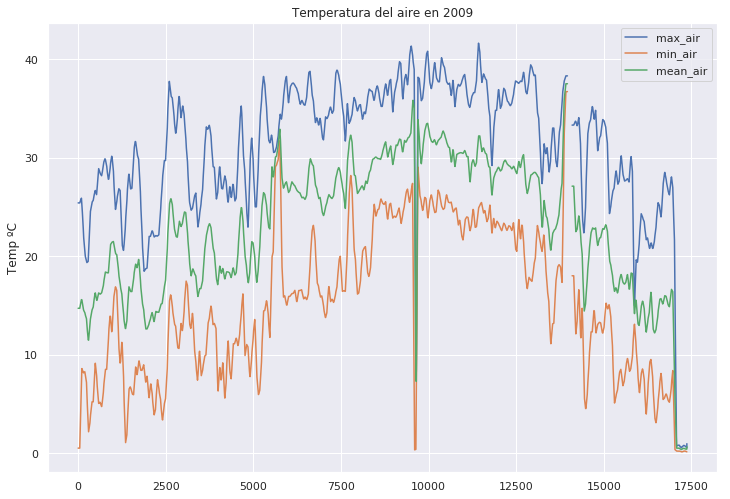

In [51]:
#Gráfica suavizada de la temperatura del aire para el 2009
sns.set(rc={'figure.figsize':(12,8.27)})
fig=plt.figure(); df_airTroll.plot() ; plt.legend(loc='best')
plt.title("Temperatura del aire en 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

fig.savefig("airTroll",plt=2000)